In [1]:
import os

In [2]:
len(os.listdir('appa-real-face-cropped/final_files/final_files'))

7591

In [3]:
import pandas as pd
 
labels = pd.read_csv('appa-real-face-cropped/labels.csv')
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dropout,Dense,Flatten


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale=1/255)


train_datagen_flow = train_datagen.flow_from_dataframe(
                          dataframe=labels,
                          directory='appa-real-face-cropped/final_files/final_files',
                          x_col="file_name", 
                          y_col="real_age",
                          class_mode = 'raw',
                          target_size= (224,224),
                          batch_size= 32
  )

In [6]:
def load_train(path):
    labels= pd.read_csv(path+'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255)
    
    train_dgen_flow = train_datagen.flow_from_dataframe(
                            dataframe=labels,
                            directory=path +'final_files/final_files',
                            x_col ='file_name',
                            y_col='real_age',
                            target_size=(224,224),
                            class_mode='raw',
                            batch_size=32,
                            subset='training'
    )
    return train_dgen_flow


def load_test(path):
    labels= pd.read_csv(path+'labels.csv')
    validation_datagen = ImageDataGenerator(validation_split=0.25,rescale=1/255)
    
    test_dgen_flow = validation_datagen.flow_from_dataframe(
                            dataframe=labels,
                            directory=path + 'final_files/final_files',
                            x_col='file_name',
                            y_col='real_age',
                            target_size=(224,224),
                            batch_size=32,
                            class_mode='raw',
                            subset='validation'
    )
    return test_dgen_flow

In [34]:
def create_model(input_shape):
    model = Sequential([
        Conv2D(32,3,input_shape= input_shape,activation='relu'),
        Dropout(0.2),
        MaxPooling2D(),
        Conv2D(32,3,activation='relu'),
        MaxPooling2D(),
        Conv2D(16,3,activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(128,activation='relu'),
        Dense(1,activation='relu')
    ])
    model.compile(optimizer='adam',loss ='mae',metrics=['mae'])
    
    return model



In [35]:
path = 'appa-real-face-cropped/'

In [36]:
train_data = load_train(path)
test_data = load_test(path)

Found 5694 validated image filenames.
Found 1897 validated image filenames.


In [40]:

def train_model(model,train_data,test_data,batch_size=32,epochs =20):
    model.fit(train_data,validation_data = test_data,batch_size= batch_size,epochs =epochs)
    return model

In [41]:
model = create_model(input_shape=(224,224,3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 dropout_6 (Dropout)         (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 16)       

In [42]:
model = train_model(model,train_data,test_data)

Epoch 1/20
178/178 [==============================] - 286s 2s/step - loss: 14.3670 - mae: 14.3670 - val_loss: 13.4925 - val_mae: 13.4925
Epoch 2/20
178/178 [==============================] - 279s 2s/step - loss: 12.8410 - mae: 12.8410 - val_loss: 13.1432 - val_mae: 13.1432
Epoch 3/20
178/178 [==============================] - 277s 2s/step - loss: 12.5263 - mae: 12.5263 - val_loss: 13.2245 - val_mae: 13.2245
Epoch 4/20
178/178 [==============================] - 282s 2s/step - loss: 12.0898 - mae: 12.0898 - val_loss: 11.7816 - val_mae: 11.7816
Epoch 5/20
178/178 [==============================] - 270s 2s/step - loss: 11.6565 - mae: 11.6565 - val_loss: 11.4897 - val_mae: 11.4897
Epoch 6/20
178/178 [==============================] - 278s 2s/step - loss: 11.2892 - mae: 11.2892 - val_loss: 11.3940 - val_mae: 11.3940
Epoch 7/20
178/178 [==============================] - 290s 2s/step - loss: 10.7077 - mae: 10.7077 - val_loss: 11.2751 - val_mae: 11.2751
Epoch 8/20
178/178 [=====================

# we can predict the age of person with mae of +-3.99

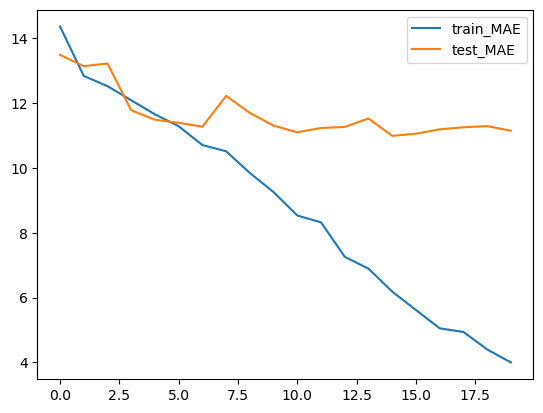

In [47]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['mae'],label='train_MAE')
plt.plot(model.history.history['val_mae'],label='test_MAE')
plt.legend()
plt.show()

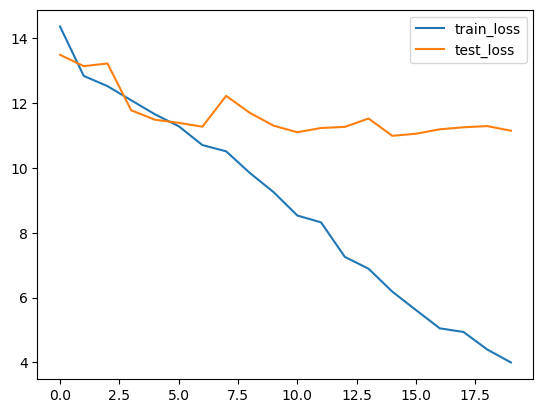

In [46]:
plt.plot(model.history.history['loss'],label='train_loss')
plt.plot(model.history.history['val_loss'],label='test_loss')
plt.legend()
plt.show()